In [1]:
import pandas as pd
import numpy as np

from exchange import *
from agents import *

import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

# Exchange Visualization

In [2]:
e = Exchange()

In [3]:
e.add_bid(100, 5, "1")
e.add_bid(102, 2, "2")
e.add_bid(103, 3, "3")
e.add_bid(104, 4, "4")
e.add_bid(105, 10, "5")
e.add_ask(106, 8, "6")
e.add_ask(107, 3, "7")
e.add_ask(109, 12, "8")
e.add_ask(110, 6, "9")
e.add_ask(115, 4, "10")

In [4]:
def show_exchange(exchange):
    bidPrices = list(exchange.bids.keys())
    bidQtys = list(exchange.bids.values())
    askPrices = list(exchange.asks.keys())
    askQtys = list(exchange.asks.values())

    plt.figure(figsize=(3, 5))
    plt.barh(bidPrices, bidQtys, color="green", label=f"bid qty: {sum(bidQtys)}")
    plt.barh(askPrices, askQtys, color="red", label=f"ask qty: {sum(askQtys)}")
    plt.legend()
    plt.ylabel("price")
    plt.xlabel("qty")
    plt.title("Exchange Ladder")

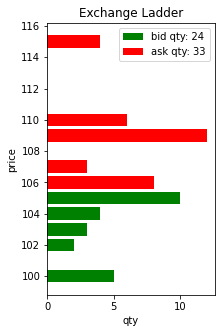

In [5]:
show_exchange(e)

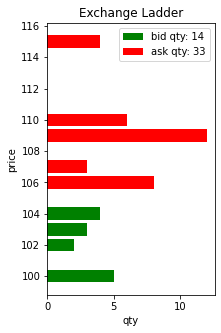

In [6]:
e.add_ask(105, 10, "11")
show_exchange(e)

# Simulation Elements

In [8]:
'''
# TODO: agent arrival process
# TODO: agent cancel duration
# TODO: true price movement changing (variance over time)
# TODO: agent reading true price (with some noise)
# TODO: agent aggression level (bid / ask)
# TODO: agent interaction logic with exchange
'''


'\n# TODO: agent arrival process\n# TODO: agent cancel duration\n# TODO: true price movement changing (variance over time)\n# TODO: agent reading true price (with some noise)\n# TODO: agent aggression level (bid / ask)\n# TODO: agent interaction logic with exchange\n'

In [9]:
def check_agent_arrival(timestamp, time):
    return time

In [10]:
np.random.exponential()

0.7840667096449847

In [11]:
intervals = [random.expovariate(2) for i in range(10)]
intervals

[0.09051858392819233,
 0.1252405828395679,
 0.061868599455182714,
 0.3292356592150499,
 0.699699584226516,
 0.745302846870097,
 0.46509308016609985,
 0.02851949407474439,
 0.11478373879251977,
 0.09971853682427148]

In [12]:
np.cumsum(intervals)

array([0.09051858, 0.21575917, 0.27762777, 0.60686343, 1.30656301,
       2.05186586, 2.51695894, 2.54547843, 2.66026217, 2.75998071])

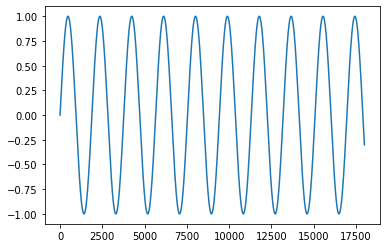

In [13]:
x = np.arange(0, 5 * 60 * 60)
T = 60 * 5 # period
y = np.sin(x / T)
plt.plot(x, y)

In [14]:
t = 40
true_price = np.sin(t / T)
true_price

0.13293862262231407

In [15]:
np.random.normal()

1.1560386150956548

In [ ]:
# pre-determine some true price curve as a function of time
# can begin as uniform
random.seed(88)

### defining hyperparameters ###
agent_arrival_rate = 10
taker_probability = 0.2
true_price_func = lambda t: np.sin(t / 5*60)

while timestamp < 10: 
    timestamp = 0
    customer_id = 0
    
    ### pseudo code this ###

    # agent arrives by some exponential inter-arrival time simulating poisson
    # increment timestamp by exponential variable
    # calculate agent's characteristics (aggression level, theo value, cancel duration)
    # first check existing cancel queue, remove orders if necessary
    # add agent's bid/asks to exchange
    # plot exchange
    # sidenote: also need to increment customerids

    # add in own policy logic 

    ### ------------------------------------------------------------ ###

    # agents arrive at same rate, some probability they are maker vs taker
    agent_arrival_time = random.expovariate(agent_arrival_rate)

    # aggressiveness = a.get_aggressiveness()
    # cancel_duration = a.get_cancel_duration()

    agent_is_taker = random.random() < taker_probability
    if agent_is_taker:
        a = Taker()
    else: 
        a = Maker()

In [16]:
from scipy.stats import skewnorm, norm

In [32]:
r = skewnorm.rvs(a, loc=2, scale=3, size=1)
r

array([2.34944778])

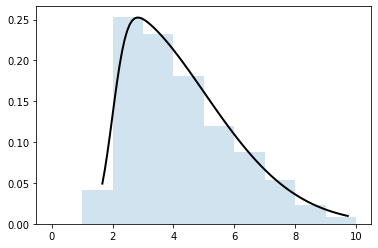

In [17]:
# aggressiveness level distributions, in units of ticks from theo value
a = 8
rv = skewnorm(a, loc=2, scale=3)
x = np.linspace(skewnorm.ppf(0.01, a, loc=2, scale=3), skewnorm.ppf(0.99, a, loc=2, scale=3), 100)

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = skewnorm.rvs(a, loc=2, scale=3, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

In [33]:
round(4.2)

4

In [35]:
round(4.8)

5

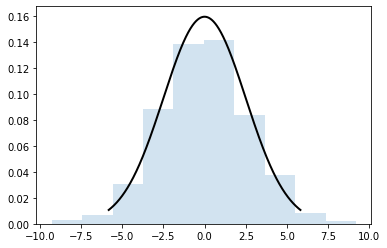

In [18]:
# agent theo value
# simply add gaussian noise

sd = 2.5
rv = norm(scale=sd)
x = np.linspace(norm.ppf(0.01, scale=sd), norm.ppf(0.99, scale=sd), 1000)

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = norm.rvs(scale=sd, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [19]:
# for now cancel duration can just be an integer
cancel_duration = 180 # seconds